1. 데이터 가져오기
    + sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    + diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [6]:
from sklearn.datasets import load_diabetes
# 데이터셋 가져오기
diabetes=load_diabetes()

df_X=diabetes.data
df_y=diabetes.target

print(df_X.shape)

(442, 10)


In [7]:
import pandas as pd
import numpy as np
# print("컬럼 목록 : ",diabetes.feature_names)

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()
# df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


2. 모델에 입력할 데이터 X 준비하기
    + df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [8]:
df_X = np.array(df_X)

3. 모델에 예측할 데이터 y 준비하기
    + df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [9]:
df_y = np.array(df_y)

4. train 데이터와 test 데이터로 분리하기
    + X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [10]:
from sklearn.model_selection import train_test_split
# test_size는 훈련집합과 테스트집합의 비율로(0.8:0.2)을 의미
# random_state는 랜덤으로 훈련집합과 테스트집합을 나누기 때문에 반복 수행마다 
#   달라지는 것을 방지하기  위한 랜덤의 seed번호이다. 
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y,test_size=0.2,random_state=41)

print('훈렵집합과 테스트집합의 입력값의 shape\n',X_train.shape,X_test.shape)
print('훈렵집합과 테스트집합의 정답(label)값의 shape\n',y_train.shape,y_test.shape)

훈렵집합과 테스트집합의 입력값의 shape
 (353, 10) (89, 10)
훈렵집합과 테스트집합의 정답(label)값의 shape
 (353,) (89,)


5. 모델 준비하기
    + 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
    + 모델 함수를 구현해주세요.

In [11]:
# 입력데이터의 컬럼이 10개이고 정답데이터의 컬럼이 1개이 때문에
W = np.random.rand(X_train.shape[1])
b = np.random.rand(1)

def model(x,w,b):
    pred = 0
    for i in range(w.shape[0]):
        pred += x[:,i]*w[i]
    pred += b
    return pred

6. 손실함수 loss 정의하기
    + 손실함수를 MSE 함수로 정의해주세요.

In [12]:
# mean square error
def MSE(a, b):
    return ((a - b)**2).mean()

7. 기울기를 구하는 gradient 함수 구현하기
    + 기울기를 계산하는 gradient 함수를 구현해주세요

$$\frac{\partial L}{\partial W}=\frac{1}{N}\sum_{i=1}^N 2x_i(\hat{y_{i}}-y_i)$$
$$\frac{\partial L}{\partial b}=\frac{1}{N}\sum_{i=1}^N 2(\hat{y_{i}}-y_i)$$

In [13]:
def gradient(x, w, b, y):
    N = len(y)
    y_pred = model(x, w, b)
    
    dW = 1/N * 2 * x.T.dot(y_pred - y) # 데이터들의 합은 행렬곱으로 진행됨
    db = 2 * (y_pred - y).mean()
    return dW, db

8. 하이퍼 파라미터인 학습률 설정하기
    + 학습률, learning rate 를 설정해주세요
    + 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [14]:
lr = 0.5

9. 모델 학습하기
    + 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
    + loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
    + 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [15]:
losses_save = []
iter_n = 5001

# def remake_input(x):
#     new_input = np.delete(x,1,axis=1)*100
#     return new_input
    
# X_train_remake = remake_input(X_train)
# X_test_remake = remake_input(X_test)

# W = np.random.rand(X_train_remake.shape[1])
# b = np.random.rand(1)

for i in range(1, iter_n):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    
    y_pred = model(X_train,W,b)
    L = MSE(y_pred,y_train)
    losses_save.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
print(W,b)

Iteration 100 : Loss 3972.7025
Iteration 200 : Loss 3453.2922
Iteration 300 : Loss 3239.1464
Iteration 400 : Loss 3121.7295
Iteration 500 : Loss 3049.5483
Iteration 600 : Loss 3003.4402
Iteration 700 : Loss 2973.5314
Iteration 800 : Loss 2953.9442
Iteration 900 : Loss 2941.0047
Iteration 1000 : Loss 2932.3769
Iteration 1100 : Loss 2926.5635
Iteration 1200 : Loss 2922.5986
Iteration 1300 : Loss 2919.8561
Iteration 1400 : Loss 2917.9277
Iteration 1500 : Loss 2916.5458
Iteration 1600 : Loss 2915.5337
Iteration 1700 : Loss 2914.7741
Iteration 1800 : Loss 2914.1887
Iteration 1900 : Loss 2913.7246
Iteration 2000 : Loss 2913.3458
Iteration 2100 : Loss 2913.0278
Iteration 2200 : Loss 2912.7535
Iteration 2300 : Loss 2912.5110
Iteration 2400 : Loss 2912.2919
Iteration 2500 : Loss 2912.0903
Iteration 2600 : Loss 2911.9018
Iteration 2700 : Loss 2911.7233
Iteration 2800 : Loss 2911.5525
Iteration 2900 : Loss 2911.3877
Iteration 3000 : Loss 2911.2276
Iteration 3100 : Loss 2911.0713
Iteration 3200 : 

10. test 데이터에 대한 성능 확인하기
    + test 데이터에 대한 성능을 확인해주세요.

In [16]:
test_pred = model(X_test, W, b)
test_mse = MSE(test_pred,y_test)

print("test데이터의 MSE값은 : ",test_mse)

test데이터의 MSE값은 :  2839.5993751419896


11. 정답 데이터와 예측한 데이터 시각화하기
    + x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

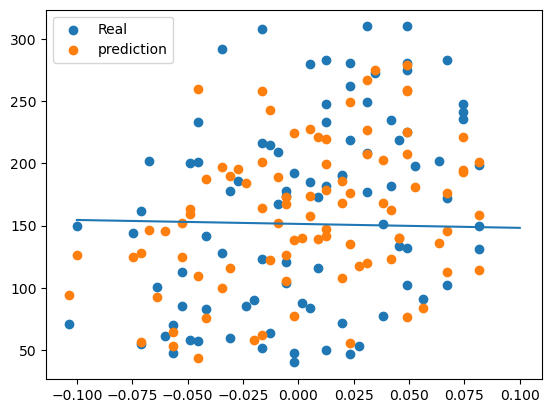

In [17]:
import matplotlib.pyplot as plt
plt.figure()
x = np.linspace(-0.1,0.1,10)
plt.plot(x,x*W[0]+b)
plt.scatter(X_test[:,0], y_test, label="Real")
plt.scatter(X_test[:,0], test_pred, label="prediction")
plt.legend()
plt.show()

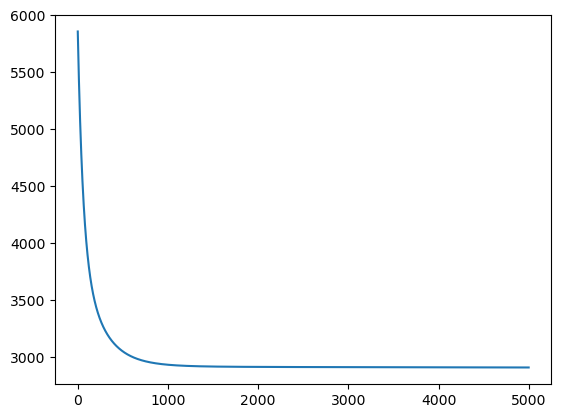

In [18]:
plt.figure()
plt.plot(losses_save)
plt.show()